# Importing and Quick view of Dataset

In [2]:
# Import libraries necessary for this project
import numpy as np
import pandas as pd
from time import time
from IPython.display import display

# Pretty display for notebooks
%matplotlib inline


data = pd.read_csv('/content/drive/MyDrive/Adult_Autism.csv')
display(data.head(n=5))

,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,A10_Score,age,gender,ethnicity,jundice,autism,country,used_app_before,result,age_desc,relation,Class/ASD
0,1,1,1,1,0,0,1,1,0,0,26,f,White-European,no,no,'United States',no,6,'18 and more',Self,NO
1,1,1,0,1,0,0,0,1,0,1,24,m,Latino,no,yes,Brazil,no,5,'18 and more',Self,NO
2,1,1,0,1,1,0,1,1,1,1,27,m,Latino,yes,yes,Spain,no,8,'18 and more',Parent,YES
3,1,1,0,1,0,0,1,1,0,1,35,f,White-European,no,yes,'United States',no,6,'18 and more',Self,NO
4,1,0,0,0,0,0,0,1,0,0,40,f,?,no,no,Egypt,no,2,'18 and more',?,NO


In [3]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# Finding the count of records

In [4]:
# Total number of records
n_records = len(data.index)

# Number of records where individual's with ASD
n_asd_yes = len(data[data['Class/ASD'] == 'YES'])

# Number of records where individual's with no ASD
n_asd_no = len(data[data['Class/ASD'] == 'NO'])

# Percentage of individuals whose are with ASD
yes_percent = float(n_asd_yes) / n_records *100

# Print the results
print ("Total number of records: {}".format(n_records))
print ("Individuals diagonised with ASD: {}".format(n_asd_yes))
print ("Individuals not diagonised with ASD: {}".format(n_asd_no))
print ("Percentage of individuals diagonised with ASD: {:.2f}%".format(yes_percent))

Total number of records: 704
Individuals diagonised with ASD: 189
Individuals not diagonised with ASD: 515
Percentage of individuals diagonised with ASD: 26.85%


**Featureset Exploration**

This data contains 704 instances, and contains the following attributes:

age: number (Age in years).

gendar: String [Male/Female].

ethnicity: String (List of common ethnicities in text format).

Born with jaundice: Boolean [yes or no].

Family member with PDD: Boolean [yes or no].

Who is completing the test: String [Parent, self, caregiver, medical staff, clinician ,etc.].

Country of residence : String (List of countries in text format).
Used the screening app before : Boolean [yes or no] (Whether the user has used a screening app)

Screening Method Type: Integer [0,1,2,3] (The type of screening methods chosen based on age category (0=toddler, 1=child, 2= adolescent, 3= adult).

Question 1-10 Answer: Binary [0, 1] (The answer code of the question based on the screening method used).

Screening Score: Integer (The final score obtained based on the scoring algorithm of the screening method used. This was computed in an automated manner).


# Data Preprocessing

Before data can be used as input for machine learning algorithms, it must be cleaned, formatted, and maybe even restructured — this is typically known as preprocessing. Unfortunately, for this dataset, there are many invalid or missing entries(?) we must deal with, moreover, there are some qualities about certain features that must be adjusted. This preprocessing can help tremendously with the outcome and predictive power of nearly all learning algorithms.

I use the optional parmaters in read_csv to convert missing data (indicated by a ?) into NaN, and to add the appropriate column names ():

In [5]:
asd_data = pd.read_csv('/content/drive/MyDrive/Adult_Autism.csv', na_values=['?'])
asd_data.head(n=5)

,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,A10_Score,age,gender,ethnicity,jundice,autism,country,used_app_before,result,age_desc,relation,Class/ASD
0,1,1,1,1,0,0,1,1,0,0,26.0,f,White-European,no,no,'United States',no,6,'18 and more',Self,NO
1,1,1,0,1,0,0,0,1,0,1,24.0,m,Latino,no,yes,Brazil,no,5,'18 and more',Self,NO
2,1,1,0,1,1,0,1,1,1,1,27.0,m,Latino,yes,yes,Spain,no,8,'18 and more',Parent,YES
3,1,1,0,1,0,0,1,1,0,1,35.0,f,White-European,no,yes,'United States',no,6,'18 and more',Self,NO
4,1,0,0,0,0,0,0,1,0,0,40.0,f,NaN,no,no,Egypt,no,2,'18 and more',NaN,NO


In [6]:
asd_data.describe()

,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,A10_Score,age,result
count,704.000000,704.000000,704.000000,704.000000,704.000000,704.000000,704.000000,704.000000,704.000000,704.000000,702.000000,704.000000
mean,0.721591,0.453125,0.457386,0.495739,0.498580,0.284091,0.417614,0.649148,0.323864,0.573864,29.698006,4.875000
std,0.448535,0.498152,0.498535,0.500337,0.500353,0.451301,0.493516,0.477576,0.468281,0.494866,16.507465,2.501493
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,17.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,21.000000,3.000000
50%,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,27.000000,4.000000
75%,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,35.000000,7.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,383.000000,10.000000


# Cleaning the Dataset

In [7]:
asd_data.loc[(asd_data['age'].isnull()) |(asd_data['gender'].isnull()) |(asd_data['ethnicity'].isnull()) 
|(asd_data['jundice'].isnull())|(asd_data['autism'].isnull()) |(asd_data['country'].isnull())
            |(asd_data['used_app_before'].isnull())|(asd_data['result'].isnull())|(asd_data['age_desc'].isnull())
            |(asd_data['relation'].isnull())]

,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,A10_Score,age,gender,ethnicity,jundice,autism,country,used_app_before,result,age_desc,relation,Class/ASD
4,1,0,0,0,0,0,0,1,0,0,40.0,f,NaN,no,no,Egypt,no,2,'18 and more',NaN,NO
12,0,1,1,1,1,1,0,0,1,0,17.0,f,NaN,no,no,Bahamas,no,6,'18 and more',NaN,NO
13,1,0,0,0,0,0,1,1,0,1,17.0,m,NaN,no,no,Austria,no,4,'18 and more',NaN,NO
14,1,0,0,0,0,0,1,1,0,1,17.0,f,NaN,no,no,Argentina,no,4,'18 and more',NaN,NO
19,0,0,0,0,0,0,1,1,0,1,34.0,m,NaN,yes,no,'United Arab Emirates',no,3,'18 and more',NaN,NO
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
652,0,0,0,0,0,0,0,0,0,1,33.0,f,NaN,no,no,'United States',no,1,'18 and more',NaN,NO
658,0,0,1,1,0,0,1,0,0,0,43.0,m,NaN,no,no,Azerbaijan,no,3,'18 and more',NaN,NO
659,1,1,1,1,1,1,0,0,1,1,44.0,m,NaN,no,no,Pakistan,no,8,'18 and more',NaN,YES
666,0,0,0,0,0,0,0,1,0,0,56.0,m,NaN,no,no,Iraq,no,1,'18 and more',NaN,NO


Since the missing data seems randomly distributed, I go ahead and drop rows with missing data.

In [8]:
asd_data.dropna(inplace=True)
asd_data.describe()

,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,A10_Score,age,result
count,609.000000,609.000000,609.000000,609.000000,609.000000,609.000000,609.000000,609.000000,609.000000,609.000000,609.000000,609.000000
mean,0.740558,0.469622,0.481117,0.520525,0.525452,0.307061,0.428571,0.665025,0.341544,0.597701,30.215107,5.077176
std,0.438689,0.499487,0.500054,0.499989,0.499762,0.461654,0.495278,0.472370,0.474617,0.490765,17.287470,2.522717
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,17.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,22.000000,3.000000
50%,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,1.000000,27.000000,5.000000
75%,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,35.000000,7.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,383.000000,10.000000


In [9]:
# Reminder of the features:
print(asd_data.dtypes)

A1_Score             int64
A2_Score             int64
A3_Score             int64
A4_Score             int64
A5_Score             int64
A6_Score             int64
A7_Score             int64
A8_Score             int64
A9_Score             int64
A10_Score            int64
age                float64
gender              object
ethnicity           object
jundice             object
autism              object
country             object
used_app_before     object
result               int64
age_desc            object
relation            object
Class/ASD           object
dtype: object



If we could have fill with median values for 'NaN' instead of dropping them, but in this situation that is little complicated as I have lot of categorical colums with 'NaN 

# Visualization with Seaborn

In [10]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(style="whitegrid", color_codes=True)

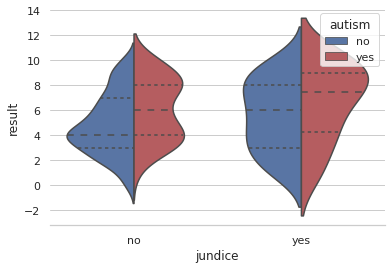

In [11]:
# Draw a nested violinplot and split the violins for easier comparison
sns.violinplot(x="jundice", y="result", hue="autism", data=asd_data, split=True,
                inner="quart", palette={'yes': "r", 'no': "b"})
sns.despine(left=True)

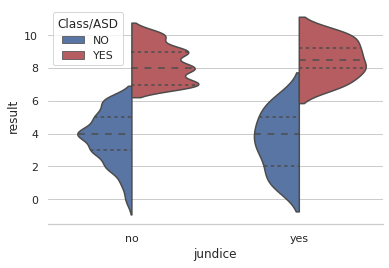

In [12]:
# Draw a nested violinplot and split the violins for easier comparison
sns.violinplot(x="jundice", y="result", hue="Class/ASD", data=asd_data, split=True,
                inner="quart", palette={'YES': "r", 'NO': "b"})
sns.despine(left=True)

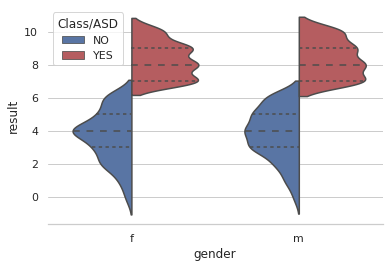

In [13]:
# Draw a nested violinplot and split the violins for easier comparison
sns.violinplot(x="gender", y="result", hue="Class/ASD", data=asd_data, split=True,
                inner="quart", palette={'YES': "r", 'NO': "b"})
sns.despine(left=True)

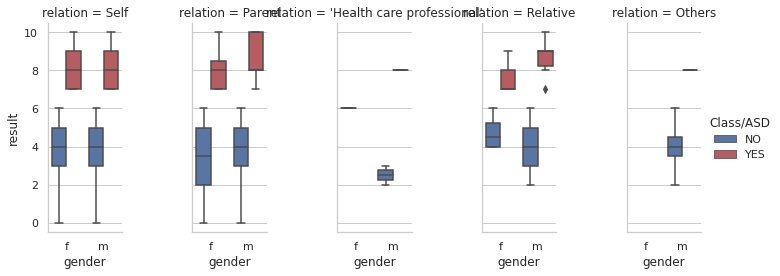

In [14]:
sns.catplot(x="gender", y="result", hue="Class/ASD",
               col="relation", data=asd_data, kind="box", height=4, aspect=.5, palette={'YES': "r", 'NO': "b"});

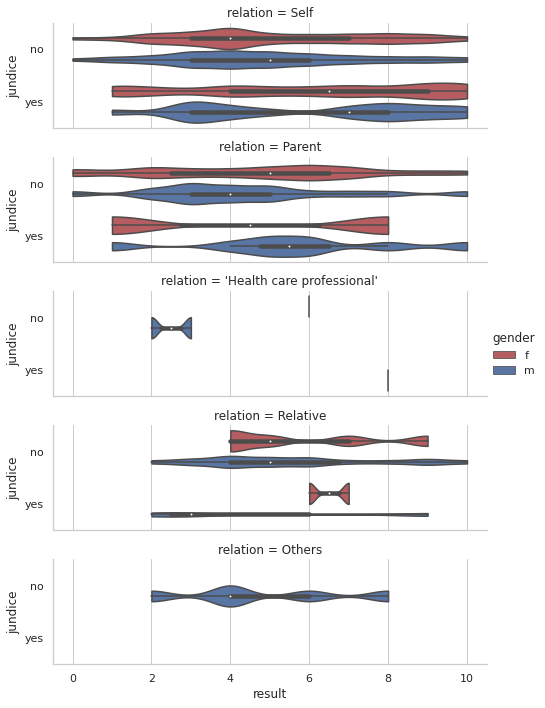

In [15]:
g = sns.catplot(x="result", y="jundice",
                   hue="gender", row="relation",
                   data=asd_data,
                    orient="h", height=2, aspect=3.5, palette={'f': "r", 'm': "b"},
                  kind="violin", dodge=True, cut=0, bw=.2)


In the two figures above, I have used two different depiction techniques to have a quick peek on the ASD dataset we are dealing with. Both of the occasions I have used factorplot module from seaborn visualization software. In the first case, I used 'swamp' kind of graph expressing the relationship between several different features present in the data whereas in the second case, 'box' method was used to present the visual way of showing how different features were associated with each other.

Next I'll need to convert the Pandas dataframes into numpy arrays that can be used by scikit_learn. Let's create an array that extracts only the feature data we want to work with and another array that contains the classes (class/ASD).

In [16]:
# Split the data into features and target label
asd_raw = asd_data['Class/ASD']
features_raw = asd_data[['age', 'gender', 'ethnicity', 'jundice', 'autism', 'country', 'result',
                      'relation','A1_Score','A2_Score','A3_Score','A4_Score','A5_Score','A6_Score','A7_Score','A8_Score',
                      'A9_Score','A10_Score']]

Some of our models require the input data to be normalized, so I proceed to normalize the attribute data. Here, I use preprocessing.MinMaxScaler().

In [17]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
numerical = ['age', 'result']

features_minmax_transform = pd.DataFrame(data = features_raw)
features_minmax_transform[numerical] = scaler.fit_transform(features_raw[numerical])
features_minmax_transform
# Show an example of a record with scaling applied
display(features_minmax_transform.head(n = 5))

,age,gender,ethnicity,jundice,autism,country,result,relation,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,A10_Score
0,0.024590,f,White-European,no,no,'United States',0.6,Self,1,1,1,1,0,0,1,1,0,0
1,0.019126,m,Latino,no,yes,Brazil,0.5,Self,1,1,0,1,0,0,0,1,0,1
2,0.027322,m,Latino,yes,yes,Spain,0.8,Parent,1,1,0,1,1,0,1,1,1,1
3,0.049180,f,White-European,no,yes,'United States',0.6,Self,1,1,0,1,0,0,1,1,0,1
5,0.051913,m,Others,yes,no,'United States',0.9,Self,1,1,1,1,1,0,1,1,1,1


# One hot encoding

From the table in Clean Data Sets above, we can see there are several features for each record that are non-numeric such as Country_of_residence, ethnicity etc. Typically, learning algorithms expect input to be numeric, which requires that non-numeric features (called categorical variables) be converted. One popular way to convert categorical variables is by using the one-hot encoding scheme. One-hot encoding creates a "dummy" variable for each possible category of each non-numeric feature. For example, assume someFeature has three possible entries: A, B, or C. We then encode this feature into someFeature_A, someFeature_B and someFeature_C.

Additionally, as with the non-numeric features, I need to convert the non-numeric target label, 'Class/ASD' to numerical values for the learning algorithm to work. Since there are only two possible categories for this label ("YES" and "NO" to Class/ASD), I can avoid using one-hot encoding and simply encode these two categories as 0 and 1, respectively. In code cell below, I will implement the following:

Use pandas.get_dummies() to perform one-hot encoding on the 'features_minmax_transform' data.
Convert the target label 'asd_raw' to numerical entries.
Set records with "NO" to 0 and records with "YES" to 1.

In [18]:
#One-hot encode the 'features_minmax_transform' data using pandas.get_dummies()
features_final = pd.get_dummies(features_minmax_transform)
display(features_final.head(5))


# Encode the 'all_classes_raw' data to numerical values
asd_classes = asd_raw.apply(lambda x: 1 if x == 'YES' else 0)



# Print the number of features after one-hot encoding
encoded = list(features_final.columns)
print ("{} total features after one-hot encoding.".format(len(encoded)))

# Uncomment the following line to see the encoded feature names
print (encoded)

,age,result,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,A10_Score,gender_f,gender_m,ethnicity_'Middle Eastern ',ethnicity_'South Asian',ethnicity_Asian,ethnicity_Black,ethnicity_Hispanic,ethnicity_Latino,ethnicity_Others,ethnicity_Pasifika,ethnicity_Turkish,ethnicity_White-European,ethnicity_others,jundice_no,jundice_yes,autism_no,autism_yes,country_'Costa Rica',country_'Czech Republic',country_'New Zealand',country_'Saudi Arabia',country_'Sierra Leone',country_'South Africa',country_'Sri Lanka',country_'United Arab Emirates',country_'United Kingdom',country_'United States',country_'Viet Nam',...,country_Chile,country_China,country_Cyprus,country_Ecuador,country_Egypt,country_Ethiopia,country_Finland,country_France,country_Germany,country_Iceland,country_India,country_Indonesia,country_Iran,country_Ireland,country_Italy,country_Jordan,country_Malaysia,country_Mexico,country_Nepal,country_Netherlands,country_Nicaragua,country_Niger,country_Oman,country_Pakistan,country_Philippines,country_Portugal,country_Romania,country_Russia,country_Serbia,country_Spain,country_Sweden,country_Tonga,country_Turkey,country_Ukraine,country_Uruguay,relation_'Health care professional',relation_Others,relation_Parent,relation_Relative,relation_Self
0,0.024590,0.6,1,1,1,1,0,0,1,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
1,0.019126,0.5,1,1,0,1,0,0,0,1,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
2,0.027322,0.8,1,1,0,1,1,0,1,1,1,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0
3,0.049180,0.6,1,1,0,1,0,0,1,1,0,1,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
5,0.051913,0.9,1,1,1,1,1,0,1,1,1,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1


94 total features after one-hot encoding.
['age', 'result', 'A1_Score', 'A2_Score', 'A3_Score', 'A4_Score', 'A5_Score', 'A6_Score', 'A7_Score', 'A8_Score', 'A9_Score', 'A10_Score', 'gender_f', 'gender_m', "ethnicity_'Middle Eastern '", "ethnicity_'South Asian'", 'ethnicity_Asian', 'ethnicity_Black', 'ethnicity_Hispanic', 'ethnicity_Latino', 'ethnicity_Others', 'ethnicity_Pasifika', 'ethnicity_Turkish', 'ethnicity_White-European', 'ethnicity_others', 'jundice_no', 'jundice_yes', 'autism_no', 'autism_yes', "country_'Costa Rica'", "country_'Czech Republic'", "country_'New Zealand'", "country_'Saudi Arabia'", "country_'Sierra Leone'", "country_'South Africa'", "country_'Sri Lanka'", "country_'United Arab Emirates'", "country_'United Kingdom'", "country_'United States'", "country_'Viet Nam'", 'country_Afghanistan', 'country_AmericanSamoa', 'country_Angola', 'country_Armenia', 'country_Aruba', 'country_Australia', 'country_Austria', 'country_Bahamas', 'country_Bangladesh', 'country_Belgium',

Text(0, 0.5, 'Frequency')

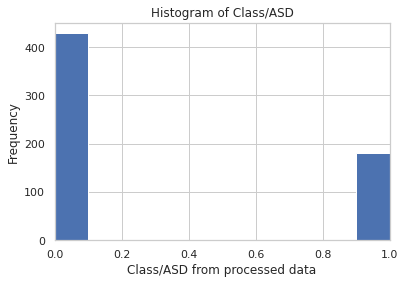

In [19]:
# histogram of Class/ASD

# 8 bins
plt.hist(asd_classes, bins=10)

# x-axis limit from 0 to 1
plt.xlim(0,1)
plt.title('Histogram of Class/ASD')
plt.xlabel('Class/ASD from processed data')
plt.ylabel('Frequency')

# Shuffling and Splitting the data

Now all categorical variables have been converted into numerical features, and all numerical features have been normalized. As always, I will now split the data (both features and their labels) into training and test sets. 80% of the data will be used for training and 20% for testing.

In [20]:
from sklearn.model_selection import train_test_split

np.random.seed(1234)

X_train, X_test, y_train, y_test = train_test_split(features_final, asd_classes, train_size=0.80, random_state=1)


# Show the results of the split
print ("Training set has {} samples.".format(X_train.shape[0]))
print ("Testing set has {} samples.".format(X_test.shape[0]))

Training set has 487 samples.
Testing set has 122 samples.


# Models

I have applied the following supervised learning models in this project which are currently available in scikit-learn.

(1): Decision Trees

(2) Random Forest

(3) Support Vector Machines (SVM)

(4) K-Nearest Neighbors (KNeighbors)

# Decision Tree

In [21]:
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier

dectree = DecisionTreeClassifier(random_state=1)

# Train the classifier on the training set
dectree.fit(X_train, y_train)

DecisionTreeClassifier(random_state=1)

# Depiction of Decision Tree Algorithm

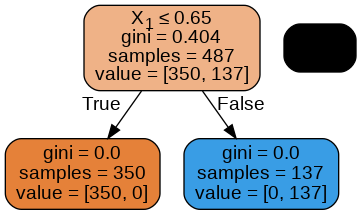

In [22]:
import pydotplus 


dot_data = tree.export_graphviz(dectree,
                                out_file=None,
                                filled=True,
                                rounded=True,
                                special_characters=True)  
graph = pydotplus.graph_from_dot_data(dot_data)  

from IPython.display import Image 
Image(graph.create_png())

# Evaluating the Model Performance

**Metrics**

We can use F-beta score as a metric that considers both precision and recall:

$$ F_{\beta} = (1 + \beta^2) \cdot \frac{precision \cdot recall}{\left( \beta^2 \cdot precision \right) + recall} $$

In particular, when $\beta = 0.5$, more emphasis is placed on precision. This is called the F$_{0.5}$ score (or F-score for simplicity).

Note: Recap of accuracy, precision, recall

**Accuracy** measures how often the classifier makes the correct prediction. It’s the ratio of the number of correct predictions to the total number of predictions (the number of test data points).


**Precision** tells us what proportion of messages we classified as spam, actually were spam. It is a ratio of true positives(words classified as spam, and which are actually spam) to all positives(all words classified as spam, irrespective of whether that was the correct classificatio), in other words it is the ratio of

**[True Positives/(True Positives + False Positives)]**



**Recall (sensitivity)** tells us what proportion of messages that actually were spam were classified by us as spam. It is a ratio of true positives(words classified as spam, and which are actually spam) to all the words that were actually spam, in other words it is the ratio of

**[True Positives/(True Positives + False Negatives)]**



For classification problems that are skewed in their classification distributions like in our case where we have

a total of 609 records with
180 individuals diagonised with ASD and
429 individuals not diagonised with ASD
accuracy by itself is not a very good metric. Thus, in this case precision and recall come in very handy. These two metrics can be combined to get the F1 score, which is weighted average(harmonic mean) of the precision and recall scores. This score can range from 0 to 1, with 1 being the best possible F1 score(we take the harmonic mean as we are dealing with ratios).

In [23]:
# make class predictions for the testing set
y_pred_class = dectree.predict(X_test)

In [24]:
from sklearn import metrics

# save confusion matrix and slice into four pieces
confusion = metrics.confusion_matrix(y_test, y_pred_class)
print(confusion)
#[row, column]
TP = confusion[1, 1]
TN = confusion[0, 0]
FP = confusion[0, 1]
FN = confusion[1, 0]

[[79  0]
 [ 0 43]]


# Metrics computed from Confusion Matrix

**Accuracy**

In [25]:
# use float to perform true division, not integer division
print((TP + TN) / float(TP + TN + FP + FN))

1.0


# Random Forest Algorithm

In [26]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score

ranfor = RandomForestClassifier(n_estimators=5, random_state=1)
cv_scores = cross_val_score(ranfor, features_final, asd_classes, cv=10)
cv_scores.mean()

0.985191256830601


AUC Score: AUC is the percentage of the ROC plot that is underneath the curve

In [27]:
# calculate cross-validated AUC
cross_val_score(ranfor, features_final, asd_classes, cv=10, scoring='roc_auc').mean()

0.9985019072228374

**F-beta Score:**

In [28]:
ranfor.fit(X_train, y_train)
from sklearn.metrics import fbeta_score
predictions_test = ranfor.predict(X_test)
fbeta_score(y_test, predictions_test, average='binary', beta=0.5)

0.9817351598173516

# SVM

In [29]:
from sklearn import svm

C = 1.0
svc = svm.SVC(kernel='linear', C=C, gamma=2)

In [30]:
cv_scores = cross_val_score(svc, features_final, asd_classes, cv=10)

cv_scores.mean()

1.0

In [31]:
# calculate cross-validated AUC
from sklearn.model_selection import cross_val_score
cross_val_score(svc, features_final, asd_classes, cv=10, scoring='roc_auc').mean()

1.0

In [32]:
svc.fit(X_train, y_train)
from sklearn.metrics import fbeta_score
predictions_test = svc.predict(X_test)
fbeta_score(y_test, predictions_test, average='binary', beta=0.5)

1.0

# KNN

In [33]:
from sklearn import neighbors

knn = neighbors.KNeighborsClassifier(n_neighbors=10)
cv_scores = cross_val_score(knn, features_final, asd_classes, cv=10)

cv_scores.mean()

0.9474590163934427

In [34]:
# calculate cross-validated AUC
from sklearn.model_selection import cross_val_score
cross_val_score(knn, features_final, asd_classes, cv=10, scoring='roc_auc').mean()

0.9930740125507567

In [35]:
knn.fit(X_train, y_train)
from sklearn.metrics import fbeta_score
predictions_test = knn.predict(X_test)
fbeta_score(y_test, predictions_test, average='binary', beta=0.5)

0.9360730593607306

In [36]:
for n in range(10, 50):
    knn = neighbors.KNeighborsClassifier(n_neighbors=n)
    cv_scores = cross_val_score(knn, features_final, asd_classes, cv=10)
    print (n, cv_scores.mean()) 

10 0.9474590163934427
11 0.9507377049180328
12 0.9507377049180328
13 0.9556830601092896
14 0.9507650273224044
15 0.944207650273224
16 0.9507650273224044
17 0.9507377049180328
18 0.9523770491803278
19 0.9540163934426229
20 0.9523770491803278
21 0.9523770491803278
22 0.9474590163934424
23 0.9490983606557375
24 0.9507377049180326
25 0.9507377049180328
26 0.9523770491803278
27 0.9507377049180328
28 0.9507377049180326
29 0.9507377049180328
30 0.9523770491803278
31 0.9474863387978143
32 0.9491256830601094
33 0.9474863387978143
34 0.9507650273224044
35 0.9491256830601094
36 0.9491256830601091
37 0.9507650273224044
38 0.9540710382513661
39 0.9524316939890708
40 0.9540710382513659
41 0.9524316939890708
42 0.9524316939890708
43 0.9507923497267757
44 0.9507923497267757
45 0.9507923497267757
46 0.9524316939890708
47 0.9524316939890708
48 0.9540710382513661
49 0.9524316939890708


# Naive Bayes

In [37]:
from sklearn.naive_bayes import MultinomialNB

#scaler = preprocessing.MinMaxScaler()
#all_features_minmax = scaler.fit_transform(all_features)

nb = MultinomialNB()
cv_scores = cross_val_score(nb, features_final, asd_classes, cv=10)

cv_scores.mean()

0.885

In [38]:
# calculate cross-validated AUC

cross_val_score(nb, features_final, asd_classes, cv=10, scoring='roc_auc').mean()

0.9445090439276485

In [39]:
nb.fit(X_train, y_train)
from sklearn.metrics import fbeta_score
predictions_test = nb.predict(X_test)
fbeta_score(y_test, predictions_test, average='binary', beta=0.5)

0.8370044052863436

# Logistic Regression

In [40]:
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression()
cv_scores = cross_val_score(logreg, features_final, asd_classes, cv=10)
cv_scores.mean()

0.9934426229508198

In [41]:
cv_scores_roc = cross_val_score(logreg, features_final, asd_classes, cv=10, scoring='roc_auc').mean()
cv_scores_roc.mean()

1.0

In [42]:
logreg.fit(X_train, y_train)
from sklearn.metrics import fbeta_score
predictions_test = logreg.predict(X_test)
fbeta_score(y_test, predictions_test, average='binary', beta=0.5)

0.9641255605381165

# Linear Discriminant Analysis

In [43]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

lda = LinearDiscriminantAnalysis()
cv_scores = cross_val_score(lda, features_final, asd_classes, cv=10)
cv_scores.mean()

0.9326229508196722

In [44]:
cv_scores_roc = cross_val_score(lda, features_final, asd_classes, cv=10, scoring='roc_auc').mean()
cv_scores_roc.mean()

0.9850590623846438

In [45]:
lda.fit(X_train, y_train)
from sklearn.metrics import fbeta_score
predictions_test = lda.predict(X_test)
fbeta_score(y_test, predictions_test, average='binary', beta=0.5)

0.9148936170212767

# Model Tuning

Now I will fine tune the chosen model. For this I use grid search (GridSearchCV) with at least one important parameter tuned with at least 3 different values. I will need to use the entire training set for this. In the code cell below, I will need to implement the following:

->Import sklearn.grid_search.GridSearchCV and sklearn.metrics.make_scorer.

->Initialize the classifier you've chosen and store it in clf.

->Set a random_state if one is available to the same state you set before.

->Create a dictionary of parameters you wish to tune for the chosen model.

Example: parameters = {'parameter' : [list of values]}.

Note: Avoid tuning the max_features parameter of your learner if that parameter is available!

->Use make_scorer to create an fbeta_score scoring object (with $\beta = 0.5$).

->Perform grid search on the classifier clf using the 'scorer', and store it in grid_obj.

->Fit the grid search object to the training data (X_train, y_train), and store it in grid_fit.

->Note that, svm.SVC may perform differently with different kernels. The choice of kernel is an example of a "hyperparamter." Here I experiented with different kernels such as 'rbf', 'sigmoid', and 'poly' and found that the best-performing kernel is linear.

In [46]:
from sklearn.metrics import fbeta_score
from sklearn.metrics import accuracy_score

from sklearn.metrics import make_scorer
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV


def f_beta_score(y_true, y_predict):
    return fbeta_score(y_true, y_predict, beta = 0.5)



clf = SVC(random_state = 1)

# HINT: parameters = {'parameter_1': [value1, value2], 'parameter_2': [value1, value2]}
parameters = {'C':range(1,6),'kernel':['linear','poly','rbf','sigmoid'],'degree':range(1,6)}

#Make an fbeta_score scoring object using make_scorer()
scorer = make_scorer(f_beta_score)

#Perform grid search on the classifier using 'scorer' as the scoring method using GridSearchCV()
grid_obj = GridSearchCV(estimator = clf, param_grid = parameters, scoring = scorer)

#Fit the grid search object to the training data and find the optimal parameters using fit()
grid_fit = grid_obj.fit(X_train, y_train)

# Get the estimator
best_clf = grid_fit.best_estimator_

# Make predictions using the unoptimized and model
predictions = (clf.fit(X_train, y_train)).predict(X_test)
best_predictions = best_clf.predict(X_test)

# Report the before-and-afterscores
print ("Unoptimized model\n------")
print ("Accuracy score on testing data: {:.4f}".format(accuracy_score(y_test, predictions)))
print ("F-score on testing data: {:.4f}".format(fbeta_score(y_test, predictions, beta = 0.5)))
print ("\nOptimized Model\n------")
print ("Final accuracy score on the testing data: {:.4f}".format(accuracy_score(y_test, best_predictions)))
print ("Final F-score on the testing data: {:.4f}".format(fbeta_score(y_test, best_predictions, beta = 0.5)))


Unoptimized model
------
Accuracy score on testing data: 0.9590
F-score on testing data: 0.9361

Optimized Model
------
Final accuracy score on the testing data: 1.0000
Final F-score on the testing data: 1.0000


# Feature Importance

An important task when performing supervised learning on a dataset like the autistic data we study here is determining which features provide the most predictive power. By focusing on the relationship between only a few crucial features and the target label we simplify our understanding of the phenomenon, which is most always a useful thing to do. In the case of this project, that means we wish to identify a small number of features that most strongly predict whether an individual has ASD or not.


Choose a scikit-learn classifier (e.g., gradientBoosting, adaboost, random forests) that has a feature_importance_ attribute, which is a function that ranks the importance of features according to the chosen classifier. In the next python cell fit this classifier to training set and use this attribute to determine the top 5 most important features for the ASD dataset.

# Extracting feature importance

Choose a scikit-learn supervised learning algorithm that has a feature_importance_ attribute availble for it. This attribute is a function that ranks the importance of each feature when making predictions based on the chosen algorithm.


In the code cell below, I will implement the following:


->Import a supervised learning model from sklearn if it is different from the three used earlier.

->Train the supervised model on the entire training set.
Extract the feature importances using '.feature_importances_'.

In [47]:
!pip install visualpython

     |████████████████████████████████| 12.0 MB 5.5 MB/s 


Visual Python
[ 1.55473723e-15  1.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  2.74688746e-16  0.00000000e+00  1.06737418e-18
  0.00000000e+00 -1.53701882e-17  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  9.88495231e-16  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.0000000

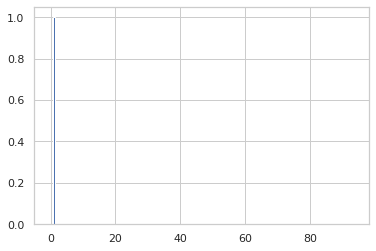

In [48]:
from sklearn.ensemble import GradientBoostingClassifier
import visualpython as vs
from matplotlib import pyplot
model = GradientBoostingClassifier(random_state=0)
model.fit(X_train, y_train)

# Extract the feature importances using .feature_importances_ 
importance = model.feature_importances_
print(importance)
# summarize feature importance
for i,v in enumerate(importance):
	print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
pyplot.bar([x for x in range(len(importance))], importance)
pyplot.show()

# Building an MLP Architecture

In [49]:

# Imports
import numpy as np
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation


np.random.seed(42)

In [50]:
# Building the model architecture with one layer of length 4


model = Sequential()
model.add(Dense(8, activation='relu', input_dim= 94))
model.add(Dropout(0.2))
model.add(Dense(1, kernel_initializer='normal', activation='sigmoid'))
   
    
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 8)                 760       
                                                                 
 dropout (Dropout)           (None, 8)                 0         
                                                                 
 dense_1 (Dense)             (None, 1)                 9         
                                                                 
Total params: 769
Trainable params: 769
Non-trainable params: 0
_________________________________________________________________


In [51]:
# Compiling the model using categorical_crossentropy loss, and rmsprop optimizer.
model.compile(loss='binary_crossentropy',
              optimizer='rmsprop',
              metrics=['accuracy'])


In [52]:
# Running and evaluating the model
hist = model.fit(X_train, y_train,
          batch_size=16,
          epochs=100,
          validation_data=(X_test, y_test), 
          verbose=2)

Epoch 1/100
31/31 - 3s - loss: 0.6868 - accuracy: 0.6366 - val_loss: 0.6819 - val_accuracy: 0.6475 - 3s/epoch - 88ms/step
Epoch 2/100
31/31 - 0s - loss: 0.6669 - accuracy: 0.7187 - val_loss: 0.6653 - val_accuracy: 0.6475 - 136ms/epoch - 4ms/step
Epoch 3/100
31/31 - 0s - loss: 0.6459 - accuracy: 0.7187 - val_loss: 0.6473 - val_accuracy: 0.6475 - 147ms/epoch - 5ms/step
Epoch 4/100
31/31 - 0s - loss: 0.6149 - accuracy: 0.7187 - val_loss: 0.6271 - val_accuracy: 0.6475 - 143ms/epoch - 5ms/step
Epoch 5/100
31/31 - 0s - loss: 0.5913 - accuracy: 0.7187 - val_loss: 0.6061 - val_accuracy: 0.6475 - 148ms/epoch - 5ms/step
Epoch 6/100
31/31 - 0s - loss: 0.5636 - accuracy: 0.7187 - val_loss: 0.5823 - val_accuracy: 0.6475 - 139ms/epoch - 4ms/step
Epoch 7/100
31/31 - 0s - loss: 0.5398 - accuracy: 0.7187 - val_loss: 0.5536 - val_accuracy: 0.6475 - 154ms/epoch - 5ms/step
Epoch 8/100
31/31 - 0s - loss: 0.5048 - accuracy: 0.7187 - val_loss: 0.5238 - val_accuracy: 0.6557 - 144ms/epoch - 5ms/step
Epoch 9/10

# Evaluating the Model

In [53]:

# Evaluating the model on the training and testing set
score = model.evaluate(X_train, y_train)
print("\n Training Accuracy:", score[1])

score = model.evaluate(X_test, y_test, verbose=0)
print("\n Testing accuracy: ", score[1])

16/16 [==============================] - 0s 3ms/step - loss: 0.0278 - accuracy: 1.0000

 Training Accuracy: 1.0

 Testing accuracy:  0.9754098653793335


# Conclusion

After exploring my ASD dataset with different kind of learning algorithms, I have arrived into this conclusion that all of my model work extremely well with the data. I have used three different metric (such as accuracy, AUC score and F-score) to measure the performance of my models, and it seems like all of the metric indicated an almost perfect classification of the ASD cases. Here I think the reason of this high performances with different models is the fact that only one of the feature is predominant over all others which I confirmed with the Feature Importance section in this notebook.


I think to build a more accurate model, we need to have access to more larger datasets. Here the number of instances after cleaning the data were not so sufficient enough so that I can claim that this model is optimum. As this dataset is only publicly available from Decemeber 2017, I think not many works that deal with this dataset is available online. In that consideration, my models can serve as benchmark models for any machine learning researcher/practitioner who will be interested to explore this dataset further. With this fact in mind, I think this are very well developed model that can detect ASD in indivisuals with certain given attributes.